In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt 
%matplotlib inline

# Reading News and Gold datas


In [2]:

df = pd.read_excel("Gold_Data.xlsx")

df = df.drop(columns=["Unnamed: 0"])

df.head()

,Date,Close,Change,0,1,2,3
0,2022-09-01,1697.55,-0.785510,rush,metal,2022,swift
1,2022-10-12,1673.12,0.421343,brief,week,tarnish,bc
2,2023-01-04,1854.68,0.826869,golden,bring,experts,pivot
3,2023-02-02,1912.60,-1.920967,hikes,oil,goldilocks,interpreted
4,2023-02-10,1865.35,0.201978,stage,seek,bugs,gold


## convert keywords to number by Labeling

In [3]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to each keyword column
label_encoders = {}  # Store encoders for future reference
for col in [0, 1, 2, 3]:
    le = LabelEncoder()
    df['col' + str(col)] = le.fit_transform(df[col])  # Encode column
    label_encoders[col] = le  # Save encoder for potential inverse transformation

df.head()

,Date,Close,Change,0,1,2,3,col0,col1,col2,col3
0,2022-09-01,1697.55,-0.785510,rush,metal,2022,swift,359,297,13,491
1,2022-10-12,1673.12,0.421343,brief,week,tarnish,bc,103,500,497,91
2,2023-01-04,1854.68,0.826869,golden,bring,experts,pivot,211,83,205,380
3,2023-02-02,1912.60,-1.920967,hikes,oil,goldilocks,interpreted,227,327,247,276
4,2023-02-10,1865.35,0.201978,stage,seek,bugs,gold,385,401,106,238


## Data visualization

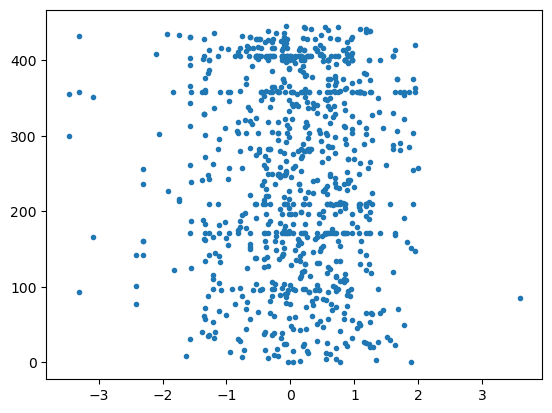

In [46]:
plt.scatter(df['Change'], df['col 0'], marker='.')

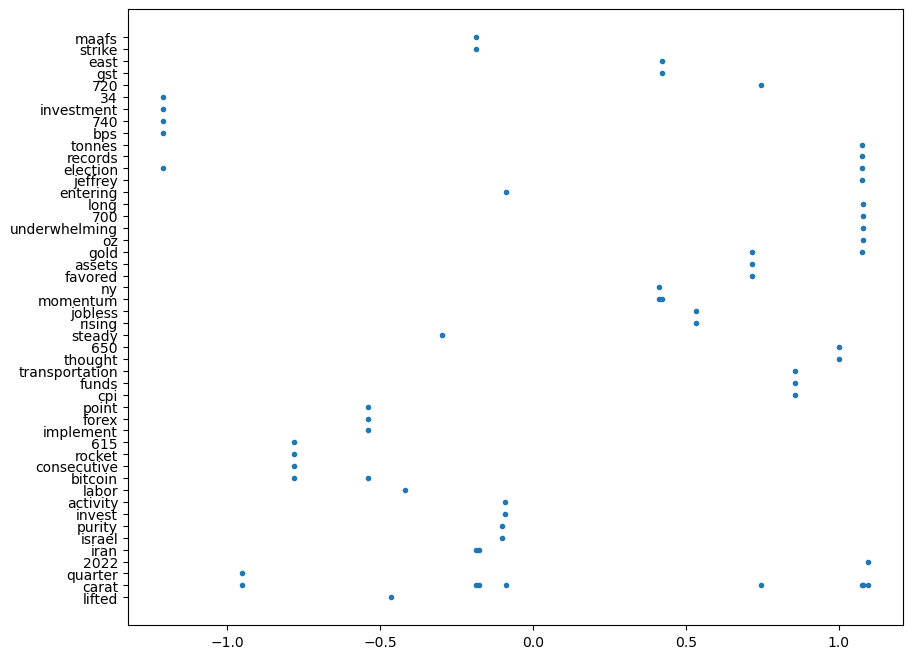

In [62]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Change'][400:460], df[1][400:460], marker='.')

### Classify changes


In [15]:
df['Change'] = df['Change'].apply(np.ceil)
df

,Date,Close,Change,0,1,2,3
0,2022-09-01,1697.55,-0.0,359,297,13,491
1,2022-10-12,1673.12,1.0,103,500,497,91
2,2023-01-04,1854.68,1.0,211,83,205,380
3,2023-02-02,1912.60,-1.0,227,327,247,276
4,2023-02-10,1865.35,1.0,385,401,106,238
...,...,...,...,...,...,...,...
876,2025-03-05,2917.18,-0.0,171,432,237,286
877,2025-03-05,2917.18,-0.0,299,108,213,238
878,2025-03-05,2917.18,-0.0,390,346,496,510
879,2025-03-05,2917.18,-0.0,366,16,212,257


# K-means

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

In [133]:
X = df[['Change','col0','col1']]

# Step 3: Standardize the feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [134]:
clusterNum = 7
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X_scaled)
labels = k_means.labels_
print(labels)

[4 3 6 4 2 5 5 6 0 1 2 2 6 5 1 6 5 3 6 1 3 3 2 6 1 3 1 6 6 1 3 6 2 6 0 1 1
 3 1 2 5 3 2 2 2 0 0 3 2 1 4 4 4 4 0 6 2 2 1 4 1 5 3 1 2 6 6 6 5 5 3 5 5 1
 5 5 5 2 5 2 3 6 2 5 2 5 5 5 5 2 2 5 5 1 6 5 2 5 2 5 2 2 5 3 5 5 1 2 5 0 2
 5 3 5 1 1 5 1 1 2 5 2 5 2 2 3 5 3 5 2 2 5 5 5 5 3 0 2 6 0 3 2 5 5 5 2 5 3
 2 3 2 2 5 5 5 5 4 2 5 5 1 4 1 4 3 1 2 5 5 5 2 5 0 6 6 0 0 0 2 5 5 6 2 2 2
 5 6 3 1 6 2 5 3 1 6 1 6 4 4 2 2 3 1 5 5 2 6 6 1 0 1 6 6 0 6 3 2 2 1 3 1 2
 6 5 2 0 0 6 6 1 1 4 4 1 6 5 6 4 0 6 2 5 1 3 5 6 1 5 0 0 3 3 0 2 3 6 6 6 6
 2 0 1 4 6 3 6 1 1 6 3 3 0 3 4 4 5 0 0 3 2 4 2 2 2 4 0 0 3 4 4 3 2 6 6 0 6
 2 3 2 6 6 6 5 3 5 0 3 5 5 4 2 2 5 1 6 2 0 2 0 0 5 1 1 4 5 3 0 5 2 3 5 4 4
 2 0 2 0 2 6 1 0 2 6 5 5 1 4 1 5 3 1 1 0 0 3 6 5 5 4 3 6 1 4 1 0 2 2 1 5 2
 1 2 2 4 1 5 6 6 3 3 6 3 3 1 1 2 3 6 2 5 5 5 6 0 2 5 3 1 0 5 5 5 3 0 6 5 5
 5 3 1 5 5 1 1 4 1 1 1 1 2 0 6 2 2 6 2 2 0 3 2 6 0 6 3 3 0 6 6 5 1 6 0 0 3
 3 6 1 1 1 5 1 6 0 3 0 6 5 5 3 5 3 2 3 0 6 3 2 0 2 4 5 4 1 1 5 5 2 5 2 5 5
 3 4 4 0 6 2 0 6 5 2 4 1 

D:\Software\Anacoda\Setup\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [126]:
df["Clus"] = labels
df[(df[0] == 'trump') | (df[1] == 'trump')].sort_values(by='Change')[['Change',0,1,'Clus']]

,Change,0,1,Clus
810,-1.280219,trump,detailed,0
654,-1.110598,decision,trump,2
726,-0.355929,wyckoff,trump,5
662,-0.126304,tariffs,trump,5
663,-0.126304,trump,rates,5
792,-0.107858,tariff,trump,5
820,0.044257,2022,trump,2
638,0.139849,trump,hamas,0
783,0.206956,trump,tariff,1
784,0.206956,tariff,trump,1


In [117]:
df[df[0] == 'trump'].groupby('Clus')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


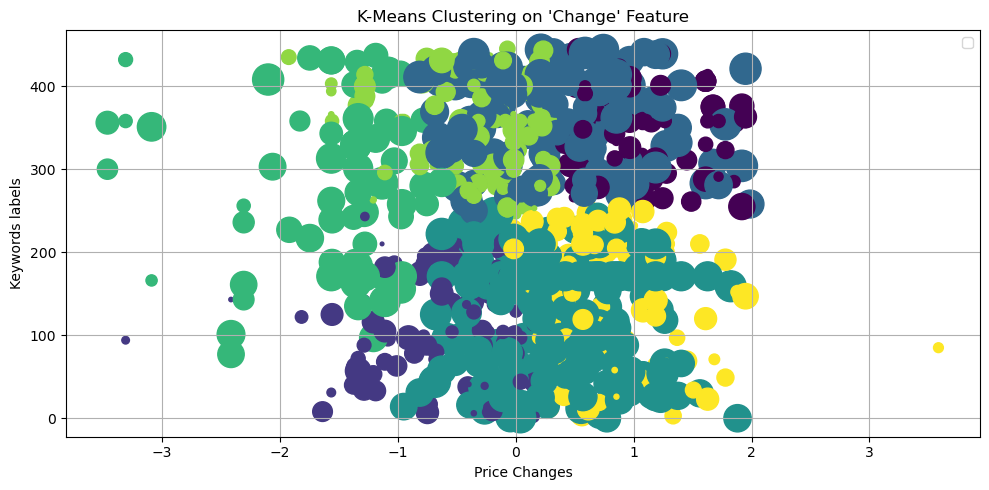

In [136]:
plt.figure(figsize=(10, 5))

# Plot training data
plt.scatter(df['Change'], df['col0'],df['col1'], c=labels, cmap='viridis', marker='o')


plt.title("K-Means Clustering on 'Change' Feature")
plt.xlabel("Price Changes")
plt.ylabel("Keywords labels")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
X_test

array([[-0.43181817],
       [ 0.56930418],
       [-1.02371607],
       [ 0.96142305],
       [ 1.09450736],
       [-0.02904475],
       [-0.37661177],
       [ 0.11439893],
       [ 1.08537123],
       [ 0.13141945],
       [ 0.56905779],
       [ 0.0597619 ],
       [ 1.27224301],
       [-1.60298957],
       [ 0.81763321],
       [ 0.39616096],
       [ 0.37494918],
       [ 0.34371732],
       [-0.89847466],
       [ 0.0597619 ],
       [ 0.74409196],
       [-0.51096926],
       [ 0.95910068],
       [ 1.09714186],
       [-0.3395001 ],
       [-0.2357652 ],
       [ 0.27549514],
       [ 0.5180359 ],
       [-1.35110341],
       [ 1.30816904],
       [ 1.7980157 ],
       [ 0.38284158],
       [-1.6348987 ],
       [-0.61012993],
       [ 0.6825479 ],
       [ 0.16674547],
       [-0.53607614],
       [ 0.2748569 ],
       [ 0.14899996],
       [-0.72358613],
       [ 0.45836585],
       [-0.25347461],
       [-0.13561976],
       [-1.02115364],
       [ 0.10817702],
       [ 0

# DBSCN

In [139]:
from sklearn.cluster import DBSCAN 

In [171]:
pdf = df[['Change','col0']]
dataset = df[['Change','col0']]

# Step 3: Standardize the feature
scaler = StandardScaler()
dataset = scaler.fit_transform(dataset)

dataset

array([[-0.98951144,  0.8391145 ],
       [ 0.35285972, -1.15410833],
       [ 0.80392158, -0.31321745],
       ...,
       [-0.13561976,  1.08048133],
       [-0.13561976,  0.89361669],
       [-0.13561976, -0.60130044]])

In [188]:
epsilon = 0.25
minimumSamples = 10
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(dataset)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 
pdf

C:\Users\Amir\AppData\Local\Temp\ipykernel_8376\161682136.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf["Clus_Db"]=labels


,Change,col0,Clus_Db
0,-0.785510,359,0
1,0.421343,103,0
2,0.826869,211,0
3,-1.920967,227,-1
4,0.201978,385,0
...,...,...,...
876,-0.017822,171,0
877,-0.017822,299,0
878,-0.017822,390,0
879,-0.017822,366,0


In [189]:
unique_labels = set(labels)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
set(labels)

{-1, 0, 1, 2, 3, 4}

In [190]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.95686275, 0.42745098, 0.2627451 , 1.        ],
       [0.99607843, 0.87843137, 0.54509804, 1.        ],
       [0.90196078, 0.96078431, 0.59607843, 1.        ],
       [0.4       , 0.76078431, 0.64705882, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

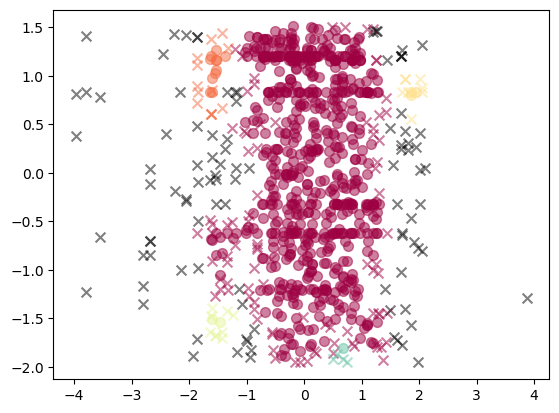

In [191]:
core_samples_mask[db.core_sample_indices_] = True

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = dataset[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = dataset[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'x', alpha=0.5)